In [2]:
import pandas as pd
X1=pd.read_csv(r"C:\Users\hp laptop\Downloads\archive (19)\complaints_processed.csv")
X1.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [3]:
X1.shape

(162421, 3)

In [4]:
X1.drop(columns=[X1.columns[0]],inplace=True)

In [5]:
X1.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [6]:
X1['product'].nunique()

5

In [7]:
X1['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [8]:
X1

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name


In [9]:
X1['len']=X1['narrative'].apply(lambda x:len(str(x).split()))

X=X1[X1['len']!=1]
X.head()

,product,narrative,len
0,credit_card,purchase order day shipping amount receive pro...,230
1,credit_card,forwarded message date tue subject please inve...,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,173
3,credit_reporting,payment history missing credit report speciali...,131
4,credit_reporting,payment history missing credit report made mis...,123


In [10]:
T=pd.get_dummies(X['product']).replace({True:1,False:0})
T

,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
162410,0,1,0,0,0
162411,0,0,0,0,1
162412,0,0,1,0,0
162413,0,0,0,1,0


In [11]:
X.isnull().sum()

product      0
narrative    0
len          0
dtype: int64

In [12]:
X['narrative']=X['narrative'].astype('str')

C:\Users\hp laptop\AppData\Local\Temp\ipykernel_9904\2330978064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['narrative']=X['narrative'].astype('str')


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162295 entries, 0 to 162414
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162295 non-null  object
 1   narrative  162295 non-null  object
 2   len        162295 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [22]:
X.reset_index(inplace=True)

In [130]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re

from nltk.stem import PorterStemmer,   WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import numpy as np
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [132]:
Data=pd.DataFrame(Data)

In [23]:
T.reset_index(inplace=True)
T

,index,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,1,0,0,0,0
1,1,1,0,0,0,0
2,2,0,0,0,0,1
3,3,0,1,0,0,0
4,4,0,1,0,0,0
...,...,...,...,...,...,...
162290,162410,0,1,0,0,0
162291,162411,0,0,0,0,1
162292,162412,0,0,1,0,0
162293,162413,0,0,0,1,0


In [134]:
Data=pd.concat([Data,T],axis=1)
Data.head()

,processed_review,index,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,purchase order day shipping amount receive pro...,0,1,0,0,0,0
1,forwarded message date tue subject please inve...,1,1,0,0,0,0
2,forwarded message cc sent friday pdt subject f...,2,0,0,0,0,1
3,payment history missing credit report speciali...,3,0,1,0,0,0
4,payment history missing credit report made mis...,4,0,1,0,0,0


In [135]:
Data.drop(columns='index',inplace=True)

In [136]:
Data.head()

,processed_review,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,purchase order day shipping amount receive pro...,1,0,0,0,0
1,forwarded message date tue subject please inve...,1,0,0,0,0
2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1
3,payment history missing credit report speciali...,0,1,0,0,0
4,payment history missing credit report made mis...,0,1,0,0,0


In [1]:
import pandas as pd
Data=pd.read_csv(r"C:\Users\ARBAJ\Downloads\archive (8)\processed_narrative.csv")
Data.head()

C:\Users\ARBAJ\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,processed_review,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,0,purchase order day shipping amount receive pro...,1,0,0,0,0
1,1,forwarded message date tue subject please inve...,1,0,0,0,0
2,2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1
3,3,payment history missing credit report speciali...,0,1,0,0,0
4,4,payment history missing credit report made mis...,0,1,0,0,0


In [2]:
Data['Tokens']=Data['processed_review'].apply(lambda x:x.split())
Data

,Unnamed: 0,processed_review,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Tokens
0,0,purchase order day shipping amount receive pro...,1,0,0,0,0,"[purchase, order, day, shipping, amount, recei..."
1,1,forwarded message date tue subject please inve...,1,0,0,0,0,"[forwarded, message, date, tue, subject, pleas..."
2,2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1,"[forwarded, message, cc, sent, friday, pdt, su..."
3,3,payment history missing credit report speciali...,0,1,0,0,0,"[payment, history, missing, credit, report, sp..."
4,4,payment history missing credit report made mis...,0,1,0,0,0,"[payment, history, missing, credit, report, ma..."
...,...,...,...,...,...,...,...,...
162290,162290,zales comenity bank closed sold account report...,0,1,0,0,0,"[zales, comenity, bank, closed, sold, account,..."
162291,162291,zelle suspended account without cause banking ...,0,0,0,0,1,"[zelle, suspended, account, without, cause, ba..."
162292,162292,zero contact made debt supposedly resolved fou...,0,0,1,0,0,"[zero, contact, made, debt, supposedly, resolv..."
162293,162293,zillow home loan nmls nmls actual quote provid...,0,0,0,1,0,"[zillow, home, loan, nmls, nmls, actual, quote..."


In [3]:
import gensim
from gensim.models import Word2Vec

W2v=Word2Vec(sentences=Data['Tokens'],window=3,sg=0,vector_size=700,min_count=2,workers=15)

In [4]:
def vectorizer(Token,W2v,vector_size=500):
    vector=[W2v.wv[i] for i in Token if i in W2v.wv ]
    if vector:
        return np.mean(vector,axis=0) 
    else:
        return np.zeros(vector_size) 

In [6]:
import numpy as np
Data['Vectors']=Data['Tokens'].apply(lambda x:vectorizer(x,W2v,vector_size=700))
Data.head()

,Unnamed: 0,processed_review,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking,Tokens,Vectors
0,0,purchase order day shipping amount receive pro...,1,0,0,0,0,"[purchase, order, day, shipping, amount, recei...","[-0.27720204, -0.004187041, -0.37708876, -0.01..."
1,1,forwarded message date tue subject please inve...,1,0,0,0,0,"[forwarded, message, date, tue, subject, pleas...","[-0.35769787, 0.13164617, -0.3314935, 0.008947..."
2,2,forwarded message cc sent friday pdt subject f...,0,0,0,0,1,"[forwarded, message, cc, sent, friday, pdt, su...","[-0.21279104, -0.09874098, -0.44146046, -0.014..."
3,3,payment history missing credit report speciali...,0,1,0,0,0,"[payment, history, missing, credit, report, sp...","[-0.38268796, 0.11046696, -0.56877875, 0.01451..."
4,4,payment history missing credit report made mis...,0,1,0,0,0,"[payment, history, missing, credit, report, ma...","[-0.39636645, 0.08490404, -0.5751573, 0.042131..."


In [7]:
TR=pd.DataFrame(Data['Vectors'].tolist())
TR.head()

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,-0.277202,-0.004187,-0.377089,-0.010805,-0.106704,0.292587,-0.298454,-0.079620,0.151323,0.106600,...,0.078029,-0.030460,0.050526,-0.169025,0.096601,0.108622,0.046607,-0.088183,-0.126085,0.425976
1,-0.357698,0.131646,-0.331493,0.008947,-0.071148,0.422272,-0.048429,-0.028097,0.274668,-0.263468,...,0.111330,0.186864,-0.186256,-0.243434,0.067922,-0.006415,-0.117773,-0.076897,-0.214868,0.366481
2,-0.212791,-0.098741,-0.441460,-0.014133,0.020912,0.201992,-0.153407,-0.012754,0.166982,-0.075236,...,0.024103,0.107629,-0.055015,-0.144688,0.105012,0.037690,0.107138,-0.086165,-0.080782,0.096067
3,-0.382688,0.110467,-0.568779,0.014517,-0.164499,0.572150,-0.079514,-0.177812,0.478041,-0.107032,...,-0.080741,0.173997,-0.065276,-0.127555,0.155381,-0.022750,0.010938,-0.177642,-0.134474,0.369495
4,-0.396366,0.084904,-0.575157,0.042132,-0.190146,0.564817,-0.103789,-0.183350,0.459665,-0.120982,...,-0.050216,0.169191,-0.088194,-0.170706,0.133603,-0.039131,-0.014697,-0.177300,-0.135789,0.375431


In [8]:
TR.shape

(162295, 700)

In [24]:
T.shape

(162295, 6)

In [26]:
T.drop(columns='index',inplace=True)

In [27]:
T.shape

(162295, 5)

In [30]:
from sklearn.decomposition import PCA
PP=PCA(n_components=0.90)
TR1=PP.fit_transform(TR)
TR1

array([[ 2.2122755 ,  0.6004658 , -0.20832056, ..., -0.04184693,
         0.07269757, -0.17657271],
       [ 1.4479549 , -0.73615   ,  0.14505655, ..., -0.02179893,
        -0.09361379, -0.04896896],
       [ 1.4055287 ,  0.91425395, -0.7308624 , ..., -0.07597417,
        -0.16952556, -0.00911386],
       ...,
       [ 1.4195572 , -0.02069545,  1.0524967 , ..., -0.12583134,
        -0.1564178 , -0.14398877],
       [ 2.9773927 ,  1.2290071 , -0.73175406, ..., -0.48169103,
         0.3368416 , -0.04500763],
       [ 1.115859  ,  1.1519493 ,  0.28294998, ...,  0.07432161,
        -0.07774512,  0.08013964]], dtype=float32)

In [32]:
TR2=pd.DataFrame(TR1)
TR2

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,2.212276,0.600466,-0.208321,0.240453,-0.106575,0.436236,-0.577174,-0.401798,-0.105907,0.519897,...,0.052737,0.044043,-0.064835,-0.071083,-0.030165,-0.051477,0.009930,-0.041847,0.072698,-0.176573
1,1.447955,-0.736150,0.145057,-0.807352,-0.020786,0.084707,-0.146960,0.010254,0.373753,-0.001463,...,0.093762,0.039150,-0.022341,-0.097772,-0.000807,0.033363,-0.034981,-0.021799,-0.093614,-0.048969
2,1.405529,0.914254,-0.730862,-0.827025,0.136148,0.132945,-0.504063,0.399517,0.279714,0.404334,...,0.054917,-0.038102,0.051424,-0.132362,0.351369,-0.054356,0.097170,-0.075974,-0.169526,-0.009114
3,1.781183,-1.051935,0.720032,0.029466,0.365286,0.165245,0.088276,-0.232230,-0.920830,-0.445947,...,-0.137408,-0.000181,0.021475,-0.009102,-0.089270,-0.154491,-0.085573,0.004513,-0.076171,-0.143043
4,1.552254,-1.219260,0.680043,0.168501,0.429338,0.192431,0.050316,-0.138980,-0.811652,-0.407909,...,-0.141314,-0.035999,0.068403,0.015738,-0.060232,-0.157029,-0.068476,-0.032443,-0.061652,-0.159464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162290,-1.933102,0.545603,0.717052,-0.322640,-0.856437,-0.234242,-0.325955,0.359101,0.169094,-0.404841,...,-0.123022,-0.022209,-0.013105,0.041978,0.002922,0.057949,0.030667,0.173636,-0.159266,-0.010669
162291,2.353366,-0.013339,-1.473034,-0.075661,-0.060216,-0.519095,-0.894892,0.701886,0.015554,-0.303204,...,-0.163372,0.038703,-0.240228,-0.067145,-0.138547,0.097286,-0.211424,0.088939,0.001471,-0.208974
162292,1.419557,-0.020695,1.052497,0.629575,-0.342166,0.510029,0.762558,-0.734167,0.632267,-0.068303,...,-0.227542,0.235788,-0.007852,-0.079438,-0.112746,0.143592,-0.198670,-0.125831,-0.156418,-0.143989
162293,2.977393,1.229007,-0.731754,-0.366290,0.231506,-0.785220,0.254037,-0.652386,-0.822905,-1.250438,...,0.167739,0.017804,-0.146938,0.255746,0.087874,0.045715,0.069588,-0.481691,0.336842,-0.045008


In [33]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

SC=SS.fit_transform(TR2)
SC

array([[ 0.98586863,  0.48910785, -0.18332951, ..., -0.28583097,
         0.50048065, -1.2194815 ],
       [ 0.6452603 , -0.59962887,  0.12765488, ..., -0.14889525,
        -0.6444757 , -0.33819893],
       [ 0.6263536 ,  0.7447031 , -0.6431849 , ..., -0.51893353,
        -1.1670839 , -0.06294373],
       ...,
       [ 0.63260525, -0.01685732,  0.9262344 , ..., -0.85947776,
        -1.0768446 , -0.9944438 ],
       [ 1.3268319 ,  1.0010844 , -0.6439696 , ..., -3.2901404 ,
         2.3189578 , -0.31084043],
       [ 0.49726656,  0.93831724,  0.249006  , ...,  0.50764614,
        -0.5352292 ,  0.55347663]], dtype=float32)

In [34]:
TR2.shape

(162295, 86)

In [36]:
SC1=SC.reshape(162295,1,86)
SC1

array([[[ 0.98586863,  0.48910785, -0.18332951, ..., -0.28583097,
          0.50048065, -1.2194815 ]],

       [[ 0.6452603 , -0.59962887,  0.12765488, ..., -0.14889525,
         -0.6444757 , -0.33819893]],

       [[ 0.6263536 ,  0.7447031 , -0.6431849 , ..., -0.51893353,
         -1.1670839 , -0.06294373]],

       ...,

       [[ 0.63260525, -0.01685732,  0.9262344 , ..., -0.85947776,
         -1.0768446 , -0.9944438 ]],

       [[ 1.3268319 ,  1.0010844 , -0.6439696 , ..., -3.2901404 ,
          2.3189578 , -0.31084043]],

       [[ 0.49726656,  0.93831724,  0.249006  , ...,  0.50764614,
         -0.5352292 ,  0.55347663]]], dtype=float32)

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN
import tensorflow as tf

In [39]:
model = Sequential()

model.add(LSTM(256, activation='relu',input_shape=(1, 86), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(256, activation='relu', return_sequences=True))
model.add(SimpleRNN(90, activation='relu', return_sequences=True))
model.add(LSTM(84, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(90, activation='relu', return_sequences=True))
model.add(SimpleRNN(90, activation='relu', return_sequences=False))
model.add(Dense(124, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax')) 
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            351232    
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 simple_rnn (SimpleRNN)      (None, 1, 128)            32896     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 256)            98560     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 90)             31230     
                                                                 
 lstm_2 (LSTM)               (None, 1, 84)            

In [44]:
AA=model.fit(SC1,T,epochs=4,batch_size=128,validation_split=0.2)

Epoch 1/4
1015/1015 [==============================] - 36s 36ms/step - loss: 0.3627 - accuracy: 0.8759 - val_loss: 0.3449 - val_accuracy: 0.8779
Epoch 2/4
1015/1015 [==============================] - 32s 32ms/step - loss: 0.3366 - accuracy: 0.8839 - val_loss: 0.3592 - val_accuracy: 0.8726
Epoch 3/4
1015/1015 [==============================] - 33s 33ms/step - loss: 0.3144 - accuracy: 0.8917 - val_loss: 0.3760 - val_accuracy: 0.8662
Epoch 4/4
1015/1015 [==============================] - 33s 32ms/step - loss: 0.2939 - accuracy: 0.8981 - val_loss: 0.3628 - val_accuracy: 0.8748


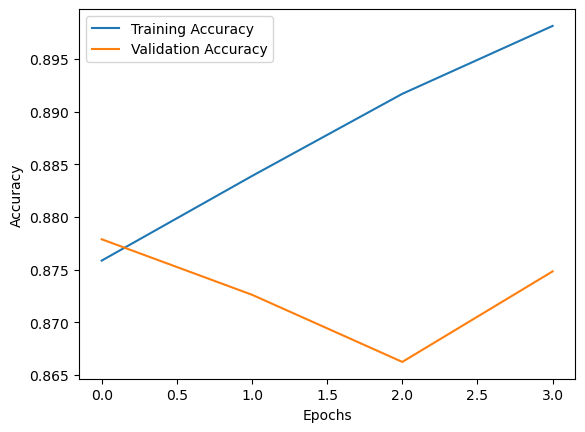

In [46]:
import matplotlib.pyplot as plt
plt.plot(AA.history['accuracy'], label='Training Accuracy')
plt.plot(AA.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
SC1[0:700]

array([[[ 0.98586863,  0.48910785, -0.18332951, ..., -0.28583097,
          0.50048065, -1.2194815 ]],

       [[ 0.6452603 , -0.59962887,  0.12765488, ..., -0.14889525,
         -0.6444757 , -0.33819893]],

       [[ 0.6263536 ,  0.7447031 , -0.6431849 , ..., -0.51893353,
         -1.1670839 , -0.06294373]],

       ...,

       [[-0.47019723, -0.39381388,  1.5006036 , ...,  2.3583572 ,
          0.92092764,  1.4151332 ]],

       [[ 0.48662585,  0.39200565,  0.08202203, ..., -0.18142161,
          4.603257  , -2.0003111 ]],

       [[ 1.0097246 , -0.19441071, -1.0546685 , ..., -0.13145582,
          1.3775734 , -1.2912284 ]]], dtype=float32)

In [58]:
pred=model.predict(SC1[0:500])
pred

16/16 [==============================] - 0s 8ms/step


array([[9.3293124e-01, 7.0318431e-03, 4.2921565e-03, 2.6125880e-03,
        5.3132132e-02],
       [7.4910772e-01, 1.7982838e-01, 3.5811111e-02, 2.6046826e-02,
        9.2059467e-03],
       [2.3390952e-01, 3.8598895e-02, 2.6338452e-02, 1.4516178e-02,
        6.8663698e-01],
       ...,
       [2.3174697e-01, 7.2208816e-01, 1.9269358e-02, 2.4306992e-02,
        2.5885345e-03],
       [1.4730047e-01, 8.3820599e-01, 7.7366312e-03, 5.3903153e-03,
        1.3666759e-03],
       [2.9704530e-05, 9.9884051e-01, 1.0399891e-03, 8.1370592e-05,
        8.4585017e-06]], dtype=float32)

In [59]:
pred1=[]
for i in pred:
    pred1.append(np.argmax(i))

In [60]:
pred1

[0,
 0,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 4,
 3,
 0,
 4,
 2,
 3,
 3,
 0,
 2,
 0,
 0,
 3,
 3,
 4,
 0,
 3,
 4,
 3,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 4,
 1,
 3,
 4,
 1,
 4,
 2,
 2,
 4,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 4,
 4,
 0,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [61]:
T

,credit_card,credit_reporting,debt_collection,mortgages_and_loans,retail_banking
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
162290,0,1,0,0,0
162291,0,0,0,0,1
162292,0,0,1,0,0
162293,0,0,0,1,0


In [65]:
T1=[]
for i in range(500):
    A=T.iloc[i,:]
    T1.append(np.argmax(A))

In [66]:
T1

[0,
 0,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 0,
 3,
 0,
 4,
 2,
 3,
 3,
 0,
 2,
 0,
 1,
 3,
 3,
 3,
 0,
 3,
 4,
 3,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 4,
 1,
 3,
 4,
 1,
 4,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 3,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 4,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [67]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(T1,pred1)

0.966

In [68]:
print(classification_report(T1,pred1))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.99      0.99      0.99       388
           2       0.89      0.86      0.88        29
           3       0.92      0.94      0.93        36
           4       0.83      1.00      0.90        19

    accuracy                           0.97       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.97      0.97      0.97       500

